## **Milestone 1: Groups, Data, Website, and ETL**

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import numpy as np
!pip3 install lxml
import lxml
import re
import matplotlib.pyplot as plt

In [2]:
url = 'https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2002GB001917' #The data I actually want to work on
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

r = requests.get(url, headers= headers)

In [3]:
soup = BeautifulSoup(r.content)

In [4]:
soup.prettify()[:5000]

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Just a moment...\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n  <meta content="noindex,nofollow" name="robots"/>\n  <meta content="width=device-width,initial-scale=1" name="viewport"/>\n  <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"/>\n  <meta content="35" http-equiv="refresh"/>\n </head>\n <body class="no-js">\n  <div class="main-wrapper" role="main">\n   <div class="main-content">\n    <noscript>\n     <div id="challenge-error-title">\n      <div class="h2">\n       <span class="icon-wrapper">\n        <div class="heading-icon warning-icon">\n        </div>\n       </span>\n       <span id="challenge-error-text">\n        Enable JavaScript and cookies to continue\n       </span>\n      </div>\n     </div>\n    </noscript>\n   </div>\n  </div>\n  <script>\n   (function(){window._cf_chl_opt={cvId: \'2\',cZone: "a

In [5]:
soup = BeautifulSoup(r.content, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Check the number of tables
print(f'Number of tables: {len(tables)}')

for index, table in enumerate(tables, start=1):
    print(f'Table {index}:')
    print(table.prettify())
    print('-' * 50)  # Print a separator

Number of tables: 0


### This is where I am stuck on the mangrove analysis right now. The tables are visible on the website but I could not find them so dor the purposes of presenting something for the first milestone, I'll take a look at this data. 

In [6]:
info_df = pd.read_csv(r'Replies.csv')

In [7]:
iinfo_df = pd.read_csv(r'Replies.csv') #DataFrame sed as reference to find questions not in main DF 
iinfo_df = info_df.drop(columns=['StartDate', 'EndDate', 'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004',
       'q0022', 'q0024', 'q0025_0001', 'q0025_0002', 'q0025_0003', 'q0026',
       'q0028', 'q0029', 'q0030', 'q0034','q0035','weight', 'educ4', 'racethn4', 'q0036'])
iinfo_df.head(50)

,Unnamed: 0,q0001,q0002,q0004_0001,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,...,q0015,q0017,q0018,q0019_0001,q0019_0002,race2,educ3,age3,kids,orientation
0,1,Somewhat masculine,Somewhat important,Not selected,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,Sometimes,NaN,NaN,Non-white,College or more,35 - 64,No children,Gay/Bisexual
1,2,Somewhat masculine,Somewhat important,Father or father figure(s),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Rarely,NaN,NaN,White,Some college,65 and up,Has children,Straight
2,3,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,...,No,Yes,Sometimes,NaN,NaN,White,College or more,35 - 64,Has children,Straight
3,4,Very masculine,Not too important,Father or father figure(s),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,Always,It?s the right thing to do,Not selected,White,Some college,65 and up,Has children,No answer
4,5,Very masculine,Very important,Not selected,Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected,NaN,...,Yes,No,Always,Not selected,Not selected,White,College or more,35 - 64,No children,Straight
5,6,Very masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,NaN,...,No,No,Always,It?s the right thing to do,Not selected,White,College or more,65 and up,Has children,Straight
6,7,Somewhat masculine,Not too important,Father or father figure(s),Not selected,Reached out to the victim to offer support,Not selected,Not selected,Not selected,NaN,...,NaN,Yes,Sometimes,NaN,NaN,Non-white,College or more,18 - 34,Has children,Gay/Bisexual
7,8,Somewhat masculine,Somewhat important,Father or father figure(s),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,Often,Not selected,Not selected,White,College or more,65 and up,No children,Straight
8,9,Very masculine,Not at all important,Father or father figure(s),Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected,NaN,...,No,No,Always,It?s the right thing to do,Not selected,Non-white,Some college,35 - 64,Has children,Straight
9,10,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Never witnessed sexual harassment,Not selected,NaN,...,No,Yes,Always,It?s the right thing to do,Not selected,White,College or more,35 - 64,No children,Straight


In [8]:
info_df['Startnnd_datetime'] = info_df['StartDate'] + ' ' + info_df['EndDate']

In [9]:
info_df = info_df.drop(columns=['StartDate', 'EndDate', 'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0006', 'q0012_0007', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0004',
       'q0022', 'q0024', 'q0025_0001', 'q0025_0002', 'q0025_0003', 'q0026',
       'q0028', 'q0029', 'q0030', 'q0034','q0035','weight', 'educ4', 'racethn4', 'q0036'])

In [10]:
info_df = info_df.rename(columns={'q0013': 'DNR_Why','q0012_0005': 'DidNotRespond2SH','q0001': 'PerceivedMasculinity', 'q0002': 'ImpotanceMascRep','q0004_0001':'RoleModel','race2':'Race', 'age3':'Age', 'educ3':'Education', 'Unnamed: 0':'Responses'})
info_df = info_df.drop(columns=['Responses'])

In [11]:
info_df = info_df.rename_axis(index = 'Responses')
info_df.head(50)

,PerceivedMasculinity,ImpotanceMascRep,RoleModel,DidNotRespond2SH,DNR_Why,Race,Education,Age,kids,orientation,Startnnd_datetime
Responses,,,,,,,,,,,
0,Somewhat masculine,Somewhat important,Not selected,NaN,NaN,Non-white,College or more,35 - 64,No children,Gay/Bisexual,5/10/18 4:01 5/10/18 4:06
1,Somewhat masculine,Somewhat important,Father or father figure(s),NaN,NaN,White,Some college,65 and up,Has children,Straight,5/10/18 6:30 5/10/18 6:53
2,Very masculine,Not too important,Father or father figure(s),Not selected,NaN,White,College or more,35 - 64,Has children,Straight,5/10/18 7:02 5/10/18 7:09
3,Very masculine,Not too important,Father or father figure(s),NaN,NaN,White,Some college,65 and up,Has children,No answer,5/10/18 7:27 5/10/18 7:31
4,Very masculine,Very important,Not selected,Not selected,NaN,White,College or more,35 - 64,No children,Straight,5/10/18 7:35 5/10/18 7:42
5,Very masculine,Somewhat important,Father or father figure(s),Not selected,NaN,White,College or more,65 and up,Has children,Straight,5/10/18 8:25 5/10/18 8:34
6,Somewhat masculine,Not too important,Father or father figure(s),Not selected,NaN,Non-white,College or more,18 - 34,Has children,Gay/Bisexual,5/10/18 8:29 5/10/18 8:41
7,Somewhat masculine,Somewhat important,Father or father figure(s),NaN,NaN,White,College or more,65 and up,No children,Straight,5/10/18 10:04 5/10/18 10:11
8,Very masculine,Not at all important,Father or father figure(s),Not selected,NaN,Non-white,Some college,35 - 64,Has children,Straight,5/10/18 11:00 5/10/18 11:07


Is the same importance placed in masculine representation (if others see you as masculine) the smae for parent and non-parents? 

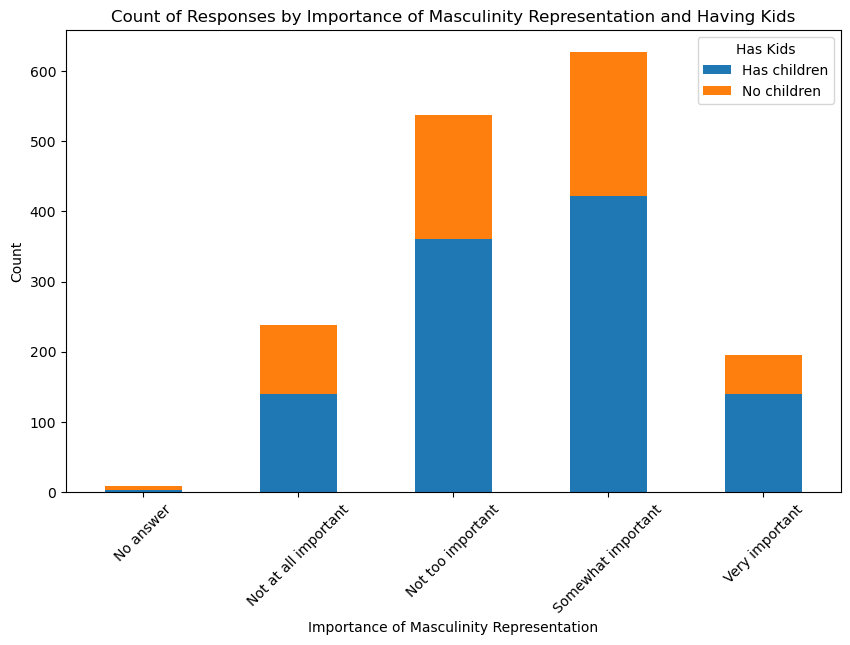

In [12]:
ct = pd.crosstab(info_df['ImpotanceMascRep'], info_df['kids'])

# Plot the bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Responses by Importance of Masculinity Representation and Having Kids')
plt.xlabel('Importance of Masculinity Representation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Has Kids')
plt.show()

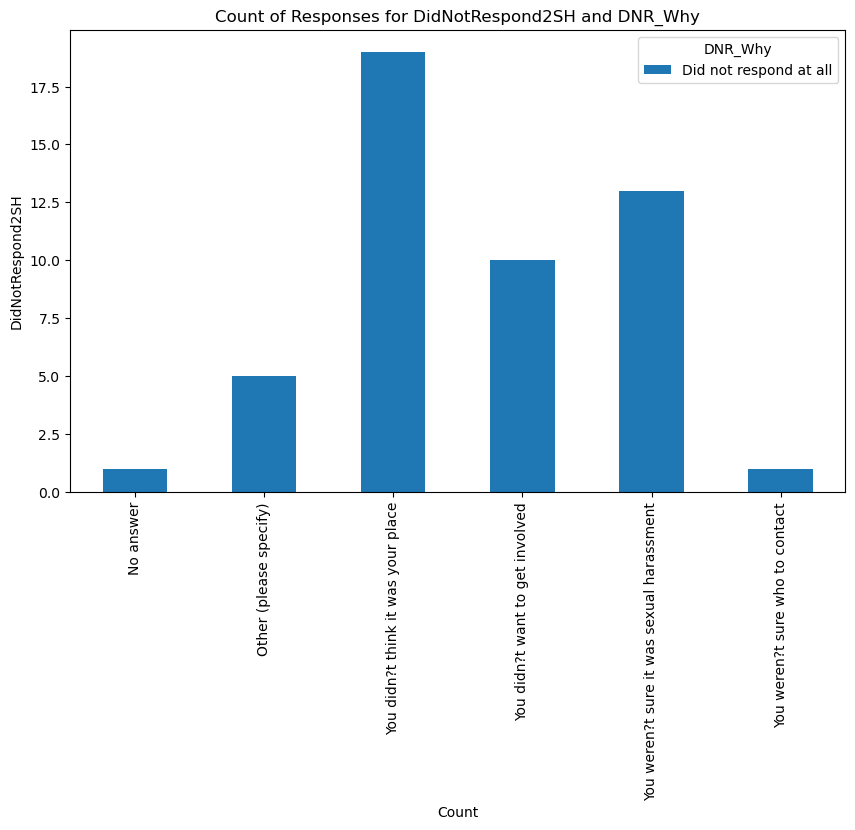

In [16]:

# Replace 'Not selected' with np.nan and drop rows with NaN in specified columns
info_df.replace('Not selected', np.nan, inplace=True)
info_df.dropna(subset=['DidNotRespond2SH', 'DNR_Why'], inplace=True)

# Create a crosstab to get the count of each category
ct = pd.crosstab(info_df['DNR_Why'], info_df['DidNotRespond2SH'])

# Plot the bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Responses for DidNotRespond2SH and DNR_Why')
plt.xlabel('Count')
plt.ylabel('DidNotRespond2SH')
plt.xticks(rotation=90)
plt.legend(title='DNR_Why')
plt.show()

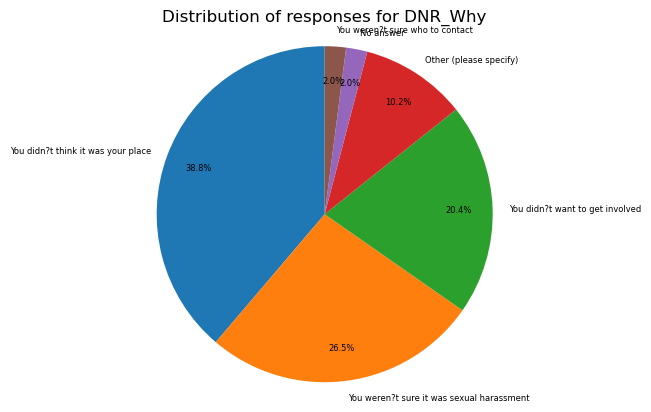

In [21]:
# Get value counts for the DNR_Why column
value_counts = info_df['DNR_Why'].value_counts()

# Plot a pie chart
fig, ax = plt.subplots()
ax.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1,
    pctdistance=0.8,  # Adjust this value to position the percentages
    textprops={'fontsize': 6}
)
ax.axis('equal')  

# Display the pie chart
plt.title('Distribution of responses for DNR_Why')
plt.show()